In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')



In [3]:
import seaborn as sns
import matplotlib.pyplot as mplt

## Problem Statement

We are try to analyse employee data and try to find possible reason for there attrition

Attrition : Wether employee leaves the organisation or not.

## Data Gathering

In [4]:
df=pd.read_csv('HR_data.csv')

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
df.shape

(1470, 35)

In [8]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## EDA

### 1.Age

In [9]:
df['Age'].isna().value_counts()

False    1470
Name: Age, dtype: int64

In [10]:
print(min(df['Age']))
print(max(df['Age']))

18
60


<AxesSubplot: >

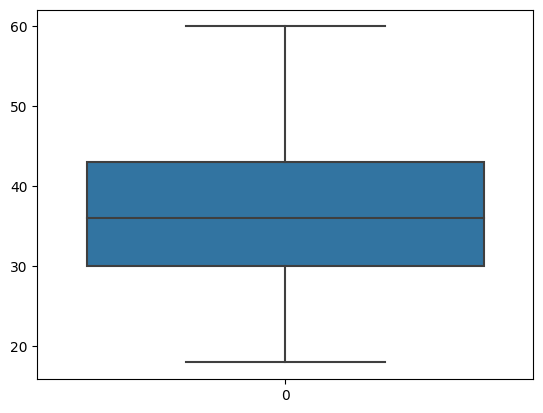

In [11]:
sns.boxplot(df['Age'])

### 2.Attrition

In [15]:
df['Attrition']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

### 3.BusinessTravel

In [16]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

### 4.DailyRate

In [17]:
df['DailyRate'].value_counts()

691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64

<AxesSubplot: >

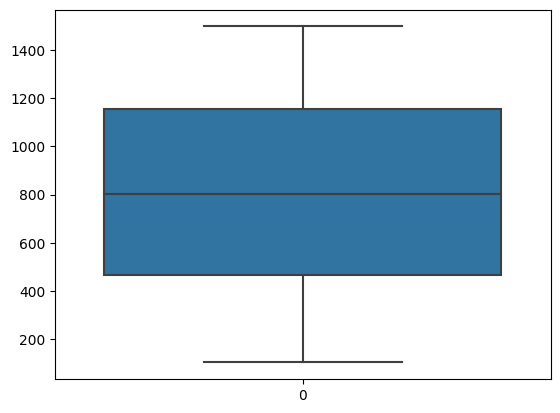

In [18]:
sns.boxplot(df['DailyRate'])

<AxesSubplot: xlabel='DailyRate', ylabel='Attrition'>

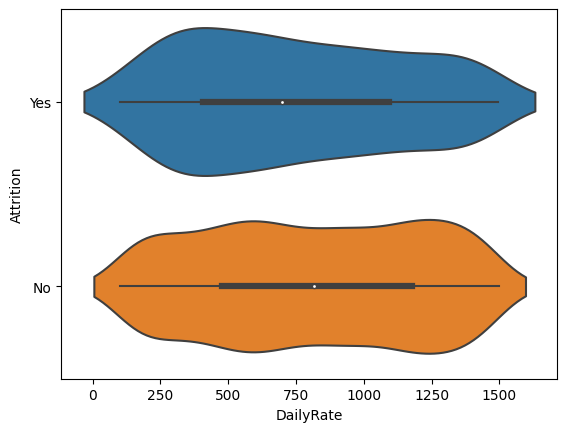

In [35]:
sns.violinplot(df, x = df['DailyRate'], y = df['Attrition'], cut=1)

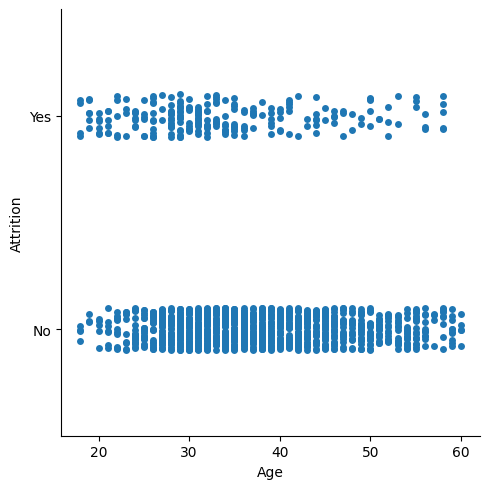

In [30]:
sns.catplot(df, x=df.Age, y = df.Attrition)

### 5.Department 

In [19]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

<BarContainer object of 1470 artists>

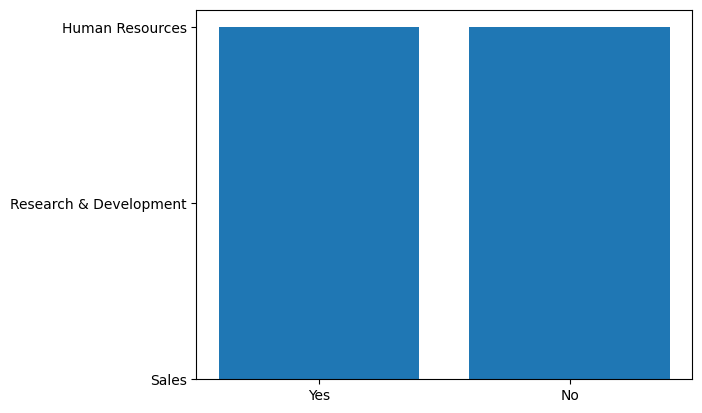

In [37]:
mplt.bar(df.Attrition,df.Department)

### 6.DistanceFromHome

In [20]:
df['DistanceFromHome'].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

<AxesSubplot: >

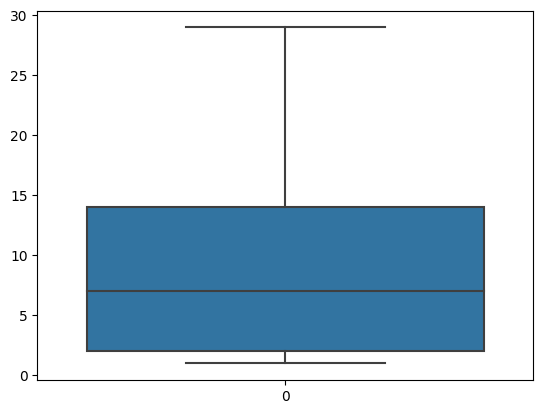

In [21]:
sns.boxplot(df['DistanceFromHome'])

### 7.Education

In [22]:
df['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

### 8.EducationField

In [23]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

### 9.EmployeeCount

In [24]:
df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

### 10.EmployeeNumber

In [25]:
df['EmployeeNumber'].value_counts()

1       1
1391    1
1389    1
1387    1
1383    1
       ..
659     1
657     1
656     1
655     1
2068    1
Name: EmployeeNumber, Length: 1470, dtype: int64

In [26]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 11.EnvironmentSatisfaction

In [27]:
df['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [28]:
mpl

NameError: name 'mpl' is not defined

### 12. Gender

In [ ]:
df['Gender'].value_counts()

In [ ]:
mplt.bar(['Male','Female'], df['Gender'].value_counts(), width=0.3)

### 13.HourlyRate

In [ ]:
sns.boxplot(df['HourlyRate'])

### 14.JobInvolvement

In [ ]:
df['JobInvolvement'].value_counts()

### 15. JobLevel

In [ ]:
df['JobLevel'].value_counts()

### 16. JobRole

In [ ]:
df['JobRole'].value_counts()

### 16.JobSatisfaction

In [ ]:
df['JobSatisfaction'].value_counts()

### 17. MaritalStatus

In [ ]:
df['MaritalStatus'].value_counts()

### 18. MonthlyIncome

In [ ]:
sns.boxplot(df['MonthlyIncome'])

In [ ]:
sum(df['MonthlyIncome']>17000)

In [ ]:
df[df['MonthlyIncome']>15000]['JobLevel'].value_counts()

### 19.MonthlyRate

In [ ]:
sns.boxplot(df['MonthlyRate'])

### 20.NumCompaniesWorked

In [ ]:
df.NumCompaniesWorked.value_counts()

### 21. Over18

In [ ]:
df[df['Over18']=='N'].shape[0]

Since all employees are above 18 this feature can be excluded.

### 22. OverTime

In [ ]:
df['OverTime'].value_counts()

### 23. PercentSalaryHike

In [ ]:
df['PercentSalaryHike'].value_counts()

### 24. PerformanceRating

In [ ]:
df['PerformanceRating'].value_counts()

### 25. RelationshipSatisfaction

In [ ]:
df['RelationshipSatisfaction'].value_counts()

### 26. StandardHours

In [ ]:
df['StandardHours'].value_counts()

Since in this column all value are 80 it can be deleted.

### 27. StockOptionLevel

In [ ]:
df['StockOptionLevel'].value_counts()

### 28. TotalWorkingYears

In [ ]:
sns.boxplot(df['TotalWorkingYears'])

### 29. TrainingTimesLastYear

In [ ]:
df['TrainingTimesLastYear'].value_counts()

### 30. WorkLifeBalance

In [ ]:
df['WorkLifeBalance'].value_counts()

### 31. YearsAtCompany

In [ ]:
df['YearsAtCompany'].value_counts()

### 32. YearsInCurrentRole

In [ ]:
df['YearsInCurrentRole'].value_counts()

### 33. YearsSinceLastPromotion

In [ ]:
df['YearsSinceLastPromotion'].value_counts()

### 34. YearsWithCurrManager

In [ ]:
df['YearsWithCurrManager'].value_counts()

In [ ]:
sns.pairplot(df)